In [1]:
import pandas as pd
import numpy as np

<h2>Introduction: </h2>

The purpose of this project is to warn user/people given the weather and the road conditions about the possibility of user/people getting into a car accident and how severe it would be, so that user/people would drive more carefully or even change travel if possible. It is an effort to reduce the frequency of car collisions which can save lives and damages happen to the common people due to car accidents.


<h2> Data understanding and preparation: </h2>

For this project we will be using a dataset available under below location.
https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv


In [2]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

c:\program files (x86)\python36-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
print(df.shape)
df.columns

(194673, 38)


Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
#df['ROADCOND'].value_counts()
#df[df['ROADCOND'] == 'Dry']
df['ROADCOND'].isna().sum()

5012

In [5]:
df['INTKEY'].value_counts()
df['INTKEY'].isna().sum()

129603

In [6]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

We will be using 'SEVERITYCODE' as our predictor or target variable because it is used measure the severity of an accident from 0 to 5 within the dataset. 

In [7]:
df_majority = df[df['SEVERITYCODE']==1]
df_minority = df[df['SEVERITYCODE']==2]
print(df_majority['SEVERITYCODE'].value_counts())
df_minority['SEVERITYCODE'].value_counts()

1    136485
Name: SEVERITYCODE, dtype: int64


2    58188
Name: SEVERITYCODE, dtype: int64

<h3> Balancing the Dataset : </h3>

The given dataset in not balanced, to balance it we can either down-sample majority class or up-sample minority class in the dataset, we will down-sample the dataset based on the SEVERITYCODE target column.


In [8]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, replace=False, n_samples=58188, random_state=123)
print(df_majority_downsampled['SEVERITYCODE'].value_counts())
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.head()

1    58188
Name: SEVERITYCODE, dtype: int64


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
25055,1,-122.292730,47.719265,29626,43684,43684,1778514,Matched,Intersection,36599.0,...,Wet,Dark - Street Lights On,NaN,5022026.0,NaN,10,Entering at angle,0,0,N
65280,1,-122.329124,47.608658,71557,84514,84514,2623093,Matched,Intersection,29926.0,...,Dry,Daylight,NaN,8235027.0,NaN,10,Entering at angle,0,0,N
86292,1,-122.292434,47.733753,94574,110476,110476,3377452,Matched,Intersection,35987.0,...,Unknown,Unknown,NaN,10323017.0,NaN,10,Entering at angle,0,0,N
155111,1,NaN,NaN,172907,222604,222884,E554578,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
64598,1,-122.339185,47.625594,70842,84273,84273,2898917,Matched,Block,NaN,...,Dry,Daylight,NaN,8069016.0,NaN,30,From opposite direction - all others,0,0,N


In [9]:
df_downsampled['SEVERITYCODE'].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [10]:
pd.get_option("display.max_column")

20

In [11]:
pd.set_option("display.max_column",40)

In [12]:
df["UNDERINFL"].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [13]:
df_downsampled.shape

(116376, 38)

<h3> Feature Selection </h3>

The main attributes used to weigh the severity of an accident from the given dataset are 'WEATHER', 'ROADCOND' and 'LIGHTCOND' as these attributes can be contributing factors to accidents. As these attributes type is “object” need to convert or create new attributes out of them with type as “int”, we will us label encoding to convert attributes in the desired type.

In [14]:
df1 = df_downsampled[['WEATHER','ROADCOND','LIGHTCOND','SEVERITYCODE']]
df1.head()

,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
25055,Raining,Wet,Dark - Street Lights On,1
65280,Clear,Dry,Daylight,1
86292,Unknown,Unknown,Unknown,1
155111,Clear,Dry,Daylight,1
64598,Clear,Dry,Daylight,1


In [15]:
#df1.reset_index(inplace=True)
pd.get_dummies(df1.WEATHER)

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
25055,0,0,0,0,0,0,1,0,0,0,0
65280,0,1,0,0,0,0,0,0,0,0,0
86292,0,0,0,0,0,0,0,0,0,0,1
155111,0,1,0,0,0,0,0,0,0,0,0
64598,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
194663,0,0,0,0,0,0,1,0,0,0,0
194666,0,1,0,0,0,0,0,0,0,0,0
194668,0,1,0,0,0,0,0,0,0,0,0
194670,0,1,0,0,0,0,0,0,0,0,0


In [16]:
X = df_downsampled[['WEATHER','ROADCOND','LIGHTCOND']].values
X[0:5]

array([['Raining', 'Wet', 'Dark - Street Lights On'],
       ['Clear', 'Dry', 'Daylight'],
       ['Unknown', 'Unknown', 'Unknown'],
       ['Clear', 'Dry', 'Daylight'],
       ['Clear', 'Dry', 'Daylight']], dtype=object)

In [17]:
df1.dropna(inplace=True)
print(df1['WEATHER'].unique())
print(len(df1['WEATHER'].unique()))
print(df1['ROADCOND'].unique())
print(df1['LIGHTCOND'].unique())

['Raining' 'Clear' 'Unknown' 'Overcast' 'Other' 'Snowing' 'Partly Cloudy'
 'Sleet/Hail/Freezing Rain' 'Fog/Smog/Smoke' 'Blowing Sand/Dirt'
 'Severe Crosswind']
11
['Wet' 'Dry' 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
['Dark - Street Lights On' 'Daylight' 'Unknown' 'Dusk' 'Dawn'
 'Dark - No Street Lights' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']


c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1['WEATHER_le'] = le.fit_transform(df1['WEATHER'])
df1['ROADCOND_le'] = le.fit_transform(df1['ROADCOND'])
df1['LIGHTCOND_le'] = le.fit_transform(df1['LIGHTCOND'])
df1.head()

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE,WEATHER_le,ROADCOND_le,LIGHTCOND_le
25055,Raining,Wet,Dark - Street Lights On,1,6,8,2
65280,Clear,Dry,Daylight,1,1,0,5
86292,Unknown,Unknown,Unknown,1,10,7,8
155111,Clear,Dry,Daylight,1,1,0,5
64598,Clear,Dry,Daylight,1,1,0,5


In [19]:
df1.dtypes

WEATHER         object
ROADCOND        object
LIGHTCOND       object
SEVERITYCODE     int64
WEATHER_le       int32
ROADCOND_le      int32
LIGHTCOND_le     int32
dtype: object

In [20]:
#df1.drop('level_0', axis=1, inplace=True)
df1.head()

,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE,WEATHER_le,ROADCOND_le,LIGHTCOND_le
25055,Raining,Wet,Dark - Street Lights On,1,6,8,2
65280,Clear,Dry,Daylight,1,1,0,5
86292,Unknown,Unknown,Unknown,1,10,7,8
155111,Clear,Dry,Daylight,1,1,0,5
64598,Clear,Dry,Daylight,1,1,0,5


In [21]:
df1['SEVERITYCODE'].value_counts()

2    57052
1    56378
Name: SEVERITYCODE, dtype: int64

In [22]:
X = np.asarray(df1[['WEATHER_le', 'ROADCOND_le', 'LIGHTCOND_le']])
X[0:5]

array([[ 6,  8,  2],
       [ 1,  0,  5],
       [10,  7,  8],
       [ 1,  0,  5],
       [ 1,  0,  5]])

In [23]:
y = np.asarray(df1['SEVERITYCODE'])
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

<h3> Data Normalization </h3>

In [24]:
# normalize dataset
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)
X[:2], y[:2]

(array([[ 1.13292854,  1.50336927, -1.42829196],
        [-0.71886902, -0.69313751,  0.39656901]]),
 array([1, 1], dtype=int64))

In [25]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<h2> Methodology </h2>

As the dataset is preprocessed and prepared after selected, engineered, normalized, split into testing/training data & balanced, let us start training the model. The goal is to find the best machine learning model for predicting accident severity, we'll train different types of models and then compare the results to see which model works best for this task.  

In this section we'll use the data prepared above to train these 4 different supervised machine learning classification algorithms:  

- Decision Tree
- K Nearest Neighbor (KNN)
- Logistic Regression
- Support Vector Machine


we'll then use different evaluation metrics like metric accuracy, F1-score and Log Loss to compare the results.

<h3> Decision Tree </h3>

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
dtree

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [27]:
dtree.fit(X_trainset, y_trainset)
predictionTree = dtree.predict(X_testset)
print(predictionTree[0:5])
print(y_testset[0:5])

[1 2 2 1 2]
[1 1 1 1 2]


In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt
dt_accuracy  = metrics.accuracy_score(y_testset, predictionTree)
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_testset, predictionTree))

DecisionTree's Accuracy:  0.5573187575303418


In [29]:
from sklearn.metrics import jaccard_score
jaccard_score(y_testset, predictionTree)

0.2672438953205565

In [30]:
from sklearn.metrics import f1_score
dt_f1 = f1_score(y_testset, predictionTree, average='weighted') 
dt_f1

0.531058680225553

<h3> K-Nearest-Neighbors </h3>

In [58]:
from sklearn.neighbors import KNeighborsClassifier
k = 11
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
neigh

KNeighborsClassifier(n_neighbors=11)

In [32]:
yhat = neigh.predict(X_testset)
yhat[0:5]

array([2, 2, 2, 1, 1], dtype=int64)

In [33]:
#print("Train set Accuracy: ", metrics.accuracy_score(y_trainset, neigh.predict(X_trainset)))
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, yhat))
knn_accuracy = metrics.accuracy_score(y_testset, yhat)

Test set Accuracy:  0.5407152722677716


In [34]:
jaccard_score(y_testset, yhat)

0.2507670182166826

In [35]:
knn_f1 = f1_score(y_testset, yhat, average='weighted') 
knn_f1

0.5137486936905326

In [36]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])

mean_acc

array([0.54597549, 0.53486732, 0.55367481, 0.54083282, 0.54653384,
       0.5441829 , 0.55370419, 0.55003086, 0.55308707, 0.55238179,
       0.55461518, 0.55370419, 0.55208793, 0.55399806, 0.55091246,
       0.55141203, 0.55376297, 0.54071527, 0.54356578])

In [37]:
std_acc

array([0.00269899, 0.00270388, 0.00269481, 0.00270142, 0.00269871,
       0.00269987, 0.00269479, 0.00269687, 0.00269515, 0.00269556,
       0.00269426, 0.00269479, 0.00269573, 0.00269462, 0.00269639,
       0.00269611, 0.00269476, 0.00270147, 0.00270017])

In [38]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5546151811690029 with k= 11


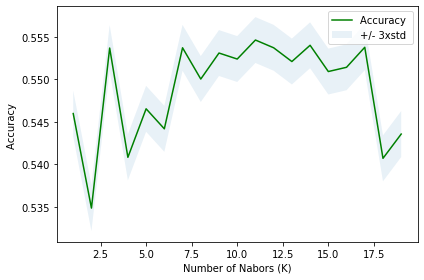

In [39]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

<h3> Logestic Regression </h3>

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [41]:
yhatlr = LR.predict(X_testset)
yhatlr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [42]:
yhat_prob = LR.predict_proba(X_testset)
yhat_prob

array([[0.53078711, 0.46921289],
       [0.51060032, 0.48939968],
       [0.51060032, 0.48939968],
       ...,
       [0.51060032, 0.48939968],
       [0.51060032, 0.48939968],
       [0.51060032, 0.48939968]])

In [43]:
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, yhatlr))
lr_accuracy = metrics.accuracy_score(y_testset, yhatlr)

Test set Accuracy:  0.5307531811102295


In [44]:
jaccard_score(y_testset, yhatlr)

0.2836249439210408

In [45]:
lr_f1 =f1_score(y_testset, yhatlr, average='weighted') 
lr_f1

0.5181903507354948

In [46]:
from sklearn.metrics import log_loss
logloss = log_loss(y_testset, yhat_prob)
logloss

0.683574754870073

In [47]:
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, yhatlr))

Test set Accuracy:  0.5307531811102295


<h3> SVM </h3>

In [50]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 

SVC()

In [51]:
yhatsvm = clf.predict(X_testset)
yhatsvm [0:5]

array([1, 2, 2, 1, 2], dtype=int64)

In [52]:
svm_f1 =f1_score(y_testset, yhatsvm, average='weighted') 
svm_f1

0.5317071539195378

In [53]:
jaccard_score(y_testset, yhatsvm)

0.2641954672828278

In [54]:
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, yhatsvm))
svm_accuracy = metrics.accuracy_score(y_testset, yhatsvm)

Test set Accuracy:  0.5601692673895795


<h2> Results : </h2>

In [57]:
report_data = {'KNN': [knn_accuracy, knn_f1, 'NA'],
              'Decision Tree': [dt_accuracy, dt_f1, 'NA'],
              'SVM': [svm_accuracy, svm_f1, 'NA'],
              'Logistic Regression': [lr_accuracy, lr_f1, logloss]}
report_df = pd.DataFrame.from_dict(report_data, columns=['Accuracy', 'F1-score', 'LogLoss'], orient='index')
report_df.to_csv('results.csv')
report_df = pd.read_csv('results.csv', index_col=0)
report_df

,Accuracy,F1-score,LogLoss
KNN,0.540715,0.513749,NaN
Decision Tree,0.557319,0.531059,NaN
SVM,0.560169,0.531707,NaN
Logistic Regression,0.530753,0.518190,0.683575


The **K Nearest Neighbor**, **Decision Tree** and **Support Vector Machine** models performed significantly better than the Log Regression model and thye achieved a Acuracy Score of ~0.55 and a F1-Score of 0.53. The SVM model shows minimal better results, but these come at the cost of a much longer training time.

The **Logistic Regression** models performed with a accuracy Score of 0.530 and a F1-Score of 0.518 with LogLoss of 0.683, significantly worse than the other algorithms. The other model shows minimal better results, but also these results come at the cost of a much longer training time than the Logistic Regression Model.


<h2>Discussion</h2>

As the initial dataset contains the categorical data with the type of "object". We cannot use this data type to proceed further in ML models hence we have used label encoding to create new attributes from these categorical attributes that were numerical in type such as int and float.

The other issue that the dataset had is the imbalance of the target attributes, using imbalance dataset could skew our result towars the majority class hence it would not be appropriate to use imbalance dataset. The imbalance dateset could be balanced using downsampling or upsampling, we have used sklearn's downsampling appraoch to generate working dataset.

After analyzing and cleaning the data, applied four ML classification models; K-Nearest Neighbor, Decision Tree, Logistic Regression and Support Vector Machine SVM. Although the other three are ideal for this project, we've used logistic regression as the target attribut is binary nature.

Evaluation metrics used to test the accuracy of our models were metric accuracy, jaccard index, f-1 score and (logloss for logistic regression). Evaluating best possible value for k, helped to improve our accuracy to be the best possible.

<h2>Conclusion</h2>

The aim and purpose of the project is to predict the severity of a traffic accident based on historical data using machine learning classification model. 
Based on historical data from weather conditions,road conditions, light conditions  pointing to certain classes, we can conclude that these three conditions have a impact on whether or not travel could result in property damage (severity 1) or injury (severity 2).

**Support Vector Machine* algorithm was best suited for this task in most cases: My Decision Tree Model achieved a accuracy Score of 0.560 and a F1-Score of 0.531 with optimal training times.

other two models **K Nearest Neighbor** and **Decision Tree**  model achieved almost same evaluation scores but at the cost of significantly higher training times.

The **Logistic Regression** models performed with a accuracy Score of 0.530 and a F1-Score of 0.518 with LogLoss of 0.683, significantly worse than the other algorithms.

The use of the outcome or prediction of this project in a real world, production environment could be challenged however it gives the basic understanding of the severity of the car accident under the provided circumstances.

